In [92]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import json


In [93]:
import matplotlib.dates as mdates

In [94]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [95]:
plt.rcParams.update({
        'font.size': 10,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'font.family': 'Arial',
        
    })

In [101]:
start_date = datetime(2020,1,1)#lang2freq[keys[0]].index.min()
end_date= datetime(2020,4,30)#lang2freq[keys[0]].index.max()
diff = (start_date-end_date)
date_format = '%b\n%Y'
major_locator = mdates.MonthLocator(range(diff.days // 30))
minor_locator = mdates.AutoDateLocator()
log = "$\log_{10}$"
freq = "$\mathcal{f}$"


## Load Ngrams

In [2]:
def city_ngrams(inputdir, city_name, target_list):
    """ Get a dataframe with the target list of ngrams
    """
    comments_loc = Path(inputdir)
    date2rank = {}
    for file in sorted(comments_loc.glob(f'{city_name}*/*')):
        print(file,end='\r')
        temp_df = pd.read_csv(file,sep='\t')
        temp_df.Ngram = temp_df.Ngram.astype(str)
        temp_df['Date'] = file.stem
        #date2rank.update({file.stem:temp_df[temp_df['Ngram'].str.contains(target)]})
        date2rank.update({file.stem:temp_df[temp_df['Ngram'].isin(target_list)]})
    new_res = pd.concat(date2rank.values())
    sm_df = new_res.pivot(index='Date', columns='Ngram',values='rank')
    sm_df.index = pd.to_datetime(sm_df.index)
    return sm_df

In [3]:
topn_1grams = ['virus','coronavirus','covid19','masks','pandemic','quarantine','symptoms','flu','distancing','lockdown','testing','n95','hospitals']

In [4]:
sm_df = city_ngrams('../data/reddit_data_0418/ngrams/2grams/', 'Boston', ['social distancing', 'from home', 'the lockdown'])

/home/hereford/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


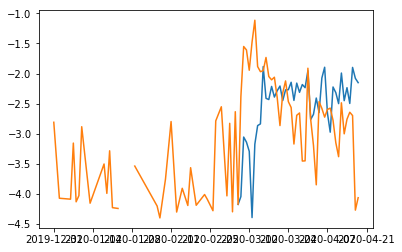

In [5]:
plt.plot(sm_df.index.values ,np.log10(sm_df['social distancing'])*-1)
plt.plot(sm_df.index.values ,np.log10(sm_df['from home'])*-1)


In [6]:
sm_df = city_ngrams('../data/reddit_data_0418/ngrams/1grams/', 'NYC', ['quarantine', 'virus', 'wfh'])

In [11]:
sm_df.iloc[:,0]

Date
2020-01-12      NaN
2020-01-14      NaN
2020-01-15      NaN
2020-01-21      NaN
2020-01-23      NaN
              ...  
2020-04-14    346.5
2020-04-15    507.5
2020-04-16    506.0
2020-04-17    611.0
2020-04-18    558.5
Name: quarantine, Length: 88, dtype: float64

(array([737435., 737449., 737463., 737477., 737491., 737505., 737519.,
        737533.]), <a list of 8 Text xticklabel objects>)

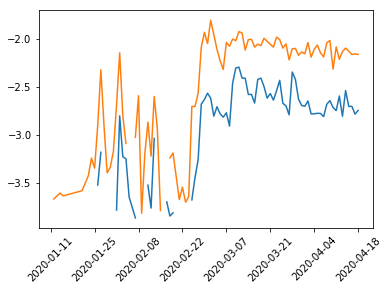

In [15]:
plt.plot(sm_df.index.values ,np.log10(sm_df.iloc[:,0])*-1)
plt.plot(sm_df.index.values ,np.log10(sm_df.iloc[:,1])*-1)
plt.xticks(rotation=45)

In [69]:
targets_1grams = ['virus','coronavirus', 'corona', 'pandemic', 'quarantine', 'Corona', 'Virus', 'Wuhan', 'flu', 'outbreak', 'sanitizer','infected']

In [70]:
sm_1grams = city_ngrams('../data/reddit_data_0418/ngrams/1grams/', 'NYC', targets_1grams)

In [8]:
sm_1grams.shape

(96, 12)

### Plot Ngrams

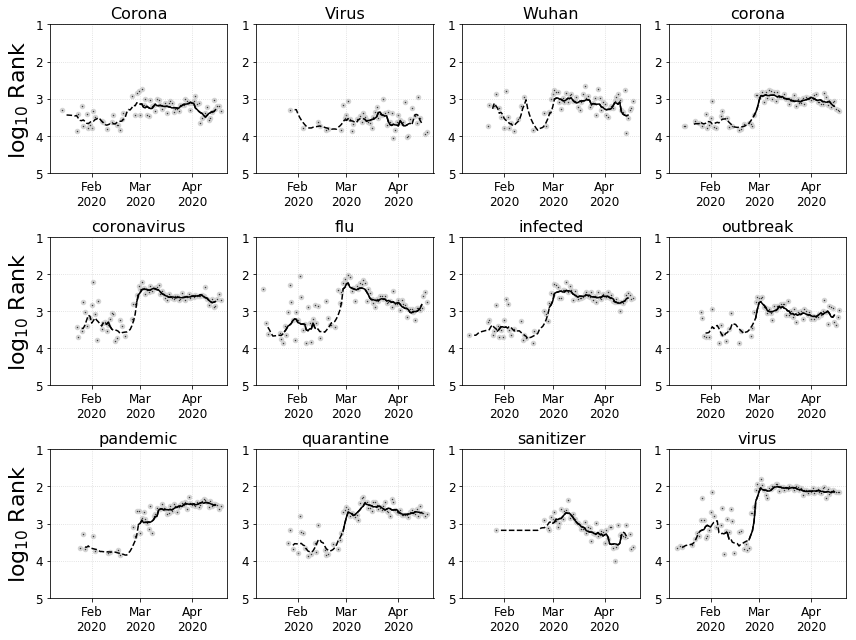

In [105]:
f,a = plt.subplots(3,4,figsize=(12,9))

a = a.ravel()

for i,col in enumerate(sm_1grams.columns):
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='o',color='lightgrey',s=20)
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='.',color='k',s=.5)
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].fillna(method='pad').rolling(7,center=True).mean())*-1,color='k',linestyle='--')
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].rolling(7,center=True).mean())*-1,color='k',linestyle='-')
    #a[i].tick_params(axis='x', rotation=45)
    a[i].set_xlim(sm_1grams.index.min()-timedelta(days=4),sm_1grams.index.max()+timedelta(days=4))
    a[i].set_ylim(-5,-1)
    a[i].set_title(col)
    a[i].grid(alpha=.5, linestyle=':')
    a[i].set_yticklabels(labels = np.arange(1,6)[::-1])
    if i in (0,4,8): a[i].set_ylabel('log$_{10}$ Rank', fontsize=22)
    a[i].xaxis.set_major_locator(major_locator)
    a[i].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
    a[i].xaxis.set_minor_locator(minor_locator)
    a[i].minorticks_off()
f.tight_layout()
plt.savefig('../figures/NYC_panel.pdf')
plt.savefig('../figures/NYC_panel.png',dpi=300)

In [10]:
targets_1grams = ['nurses', 'isolation', 'patients', 'doctors', 'hospitals', 'curve','asymptomatic','health','equipment','symptoms','distancing','lockdown']

In [11]:
len(targets_1grams)

12

In [66]:
target_1gram_dict = json.load(open('../data/rank_turb/rank_turbs.json','r'))

In [67]:
sm_1grams = city_ngrams('../data/reddit_data_0418/ngrams/1grams/', 'NYC', targets_1grams)

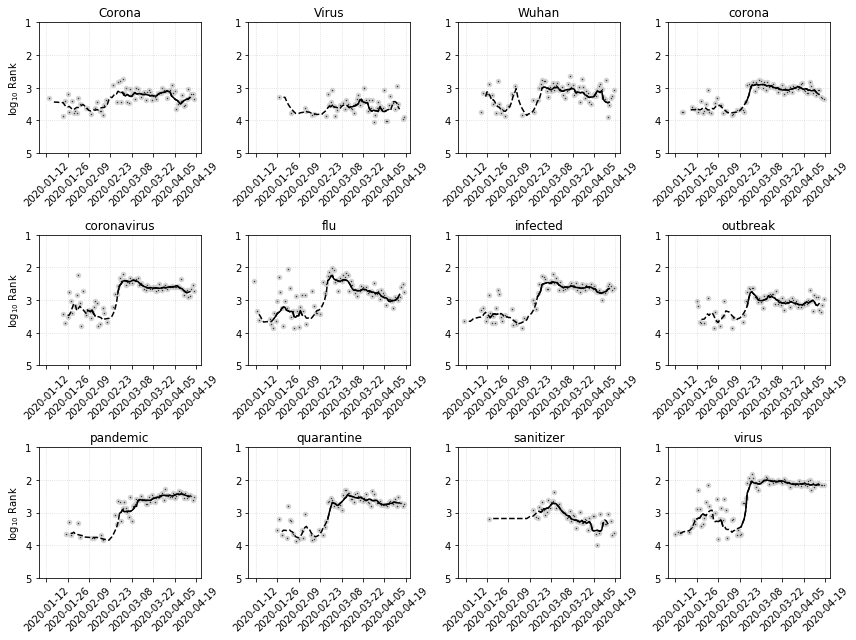

In [68]:
f,a = plt.subplots(3,4,figsize=(12,9))

a = a.ravel()

for i,col in enumerate(sm_1grams.columns):
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='o',color='lightgrey',s=20)
    a[i].scatter(sm_1grams.index.values,np.log10(sm_1grams[col])*-1,marker='.',color='k',s=.5)
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].fillna(method='pad').rolling(7,center=True).mean())*-1,color='k',linestyle='--')
    a[i].plot(sm_1grams.index.values,np.log10(sm_1grams[col].rolling(7,center=True).mean())*-1,color='k',linestyle='-')
    a[i].tick_params(axis='x', rotation=45)
    a[i].set_xlim(sm_1grams.index.min()-timedelta(days=4),sm_1grams.index.max()+timedelta(days=4))
    a[i].set_title(col)
    a[i].grid(alpha=.5, linestyle=':')
    a[i].set_ylim(-5,-1)
    a[i].set_yticklabels(labels = np.arange(1,6)[::-1])
    if i in (0,4,8): a[i].set_ylabel('log$_{10}$ Rank')
f.tight_layout()

## Apple Mobility Data

In [34]:
apple_mob_dat = pd.read_csv('../data/mobility_data/applemobilitytrends-2020-04-24.csv')

In [35]:
apple_mob_dat

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,56.56,58.77,47.51,36.90,53.34,56.93,58.06,59.69,62.87,47.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,city,Washington DC,transit,100,100.78,103.92,105.02,112.26,96.01,87.76,...,17.02,17.10,17.14,16.61,16.66,18.20,17.76,17.58,16.13,17.53
391,city,Washington DC,walking,100,99.07,109.61,104.16,123.16,119.71,106.28,...,38.69,37.76,42.50,41.80,43.51,41.89,38.40,42.53,36.16,41.55
392,city,Zurich,driving,100,102.38,110.84,105.48,113.83,109.67,102.03,...,74.89,77.13,78.01,73.62,71.97,73.74,76.41,79.95,80.90,81.56
393,city,Zurich,transit,100,101.51,108.93,97.87,103.91,98.50,93.83,...,35.68,33.65,36.77,36.75,37.66,37.50,36.60,37.99,38.11,36.02


In [36]:
available= ['New York City', 'Los Angeles', 'Boston', 'Chicago', 'Atlanta']
reddit_targets = ['NYC', 'LosAngeles', 'Portland', 'Chicago', 'Austin']

In [37]:
apple2reddit = {'NYC':'New York City',
                'LosAngeles':'Los Angeles',
                'Portland':'Portland',
                'Chicago':'Chicago',
                'Austin':'Austin'}

In [38]:
top5 = apple_mob_dat[apple_mob_dat.region.isin(apple2reddit.values())]

In [39]:
top5= top5.set_index(['region','transportation_type']).T

In [40]:
top5.drop('geo_type',inplace=True)

In [43]:
#top5.drop('alternative_name',axis=0,inplace=True)

In [44]:
top5.head()

region              Chicago                 Los Angeles                  \
transportation_type driving transit walking     driving transit walking   
2020-01-13              100     100     100         100     100     100   
2020-01-14           103.68  100.93  104.58      105.93  103.78  105.72   
2020-01-15           104.45  100.61   107.2      112.23  105.28  111.35   
2020-01-16           108.72  103.79  104.82      111.73  103.12  111.68   
2020-01-17            132.8  120.72  128.05       130.2  109.34  134.45   

region              New York City                  
transportation_type       driving transit walking  
2020-01-13                    100     100     100  
2020-01-14                 101.51   92.66   96.09  
2020-01-15                 104.51   95.29  105.77  
2020-01-16                 108.78   96.42  101.73  
2020-01-17                 122.44   107.5  117.09

In [56]:
top5['New York City']['transit']

2020-01-13      100
2020-01-14    92.66
2020-01-15    95.29
2020-01-16    96.42
2020-01-17    107.5
              ...  
2020-04-20    14.58
2020-04-21    13.49
2020-04-22    14.06
2020-04-23    14.03
2020-04-24    13.83
Name: transit, Length: 103, dtype: object

In [73]:
words_trans = top5['New York City'].join(sm_1grams)

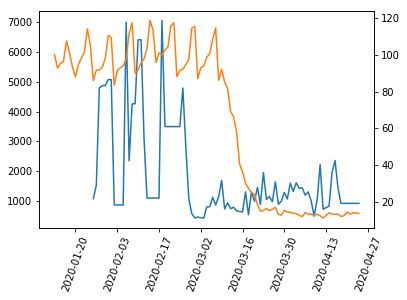

In [82]:
plt.plot(words_trans['outbreak'].fillna(method='pad'))
plt.xticks(rotation=70)
a2 = plt.twinx()
a2.plot(words_trans['transit'], color='C1')
#a2.xticks(rotation=70)


## City Activity

In [10]:
data_dir = Path('../data/reddit_data_0418/cities/')

In [11]:
city2activity = {}
for file in data_dir.glob('*/*comments*'):
    if not any([x in str(file) for x in reddit_targets]): continue
    temp_df = pd.read_csv(file)
    temp_df.created_utc = pd.to_datetime(temp_df.created_utc, unit='s').dt.date
    city2activity.update({file.stem.split('_')[0]:temp_df})
    #break

NameError: name 'reddit_targets' is not defined

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530.]), <a list of 8 Text xticklabel objects>)

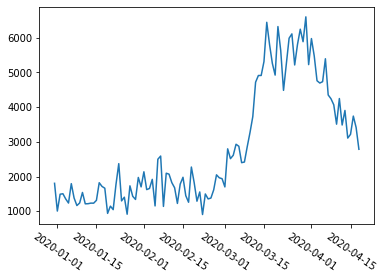

In [93]:
this_city = 'NYC'
temp_df = city2activity[this_city]
plt.plot(temp_df.created_utc.value_counts().sort_index())
plt.xticks(rotation=-35)

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530.]), <a list of 8 Text xticklabel objects>)

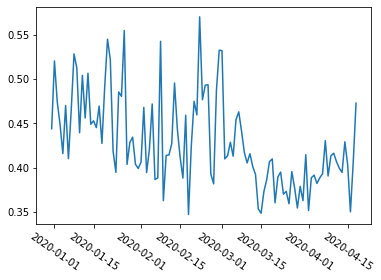

In [100]:
plt.plot(temp_df.groupby(['created_utc'])['author'].nunique().sort_index()/temp_df.created_utc.value_counts().sort_index())
plt.xticks(rotation=-35)

In [95]:
temp_df['post_len'] = temp_df.apply(lambda x: len(str(x['body'])),axis=1)

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.,
        737530.]), <a list of 8 Text xticklabel objects>)

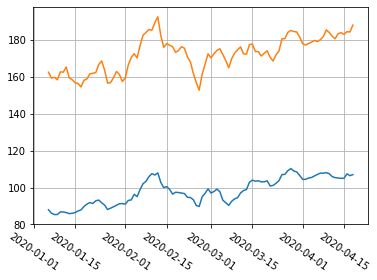

In [103]:
plt.plot(temp_df.groupby('created_utc')['post_len'].quantile(.5).rolling(7).mean())
plt.plot(temp_df.groupby('created_utc')['post_len'].mean().rolling(7).mean())
plt.grid()
plt.xticks(rotation=-35)